# SVM Classification with SGDClassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load the Iris dataset
data = datasets.load_iris()
X = data.data
y = data.target

# Convert to DataFrame for easier exploration
iris_df = pd.DataFrame(X, columns=data.feature_names)
iris_df['target'] = y

In [3]:
print('Class labels:', data.target_names)

Class labels: ['setosa' 'versicolor' 'virginica']


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 120, Test samples: 30


## Train SVM Classifier using SGDClassifier

In [6]:
# Train SGDClassifier with default hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

## Evaluate Model Performance

Accuracy: 0.767

Classification Report:
              precision    recall  f1-score   support

      setosa       0.77      1.00      0.87        10
  versicolor       1.00      0.30      0.46        10
   virginica       0.71      1.00      0.83        10

    accuracy                           0.77        30
   macro avg       0.83      0.77      0.72        30
weighted avg       0.83      0.77      0.72        30



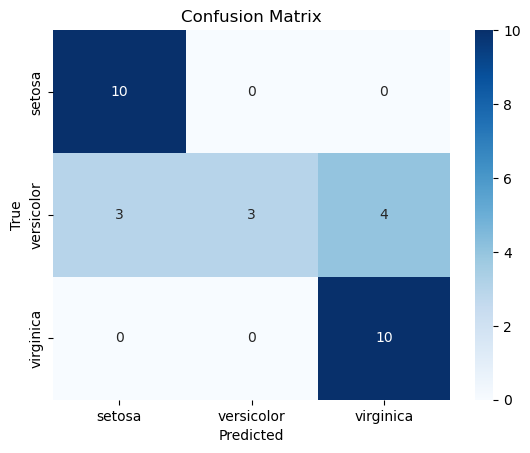

In [7]:
# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.3f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Experiment with Different Hyperparameters

In [8]:
# Define hyperparameter grid
param_grid = [
    {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.0001, 'max_iter': 1000},
    {'loss': 'hinge', 'penalty': 'l1', 'alpha': 0.001, 'max_iter': 1000},
    {'loss': 'log_loss', 'penalty': 'l2', 'alpha': 0.0001, 'max_iter': 1000},
    {'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'max_iter': 2000},
    {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.01, 'max_iter': 500},
]

In [9]:
results = []
for i, params in enumerate(param_grid):
    clf = SGDClassifier(random_state=42, **params)
    clf.fit(X_train, y_train)
    y_pred_hp = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_hp)
    results.append({'params': params, 'accuracy': acc})
    print(f"Model {i+1}: {params}, Accuracy: {acc:.3f}")

Model 1: {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.0001, 'max_iter': 1000}, Accuracy: 0.767
Model 2: {'loss': 'hinge', 'penalty': 'l1', 'alpha': 0.001, 'max_iter': 1000}, Accuracy: 0.967
Model 3: {'loss': 'log_loss', 'penalty': 'l2', 'alpha': 0.0001, 'max_iter': 1000}, Accuracy: 0.833
Model 4: {'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'max_iter': 2000}, Accuracy: 0.700
Model 5: {'loss': 'hinge', 'penalty': 'l2', 'alpha': 0.01, 'max_iter': 500}, Accuracy: 0.900


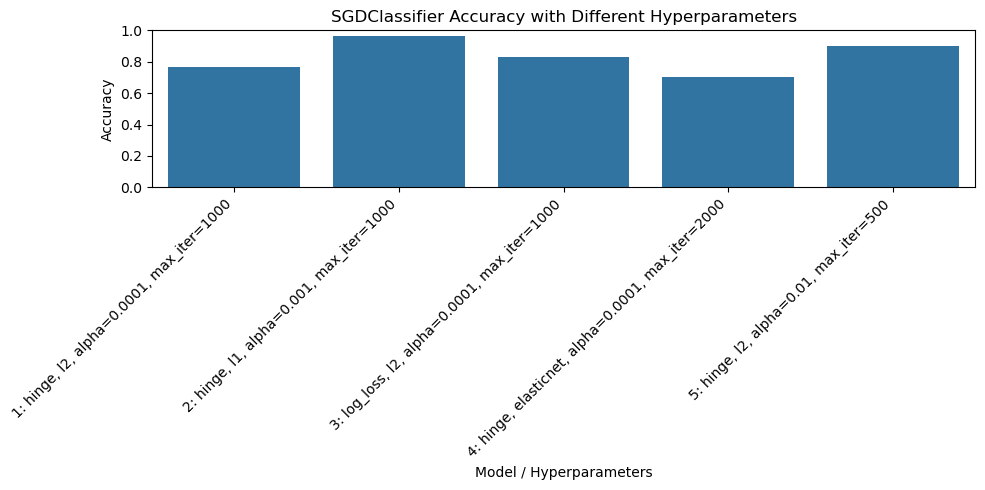

In [10]:
# Visualize the results
params_labels = [f"{i+1}: {r['params']['loss']}, {r['params']['penalty']}, alpha={r['params']['alpha']}, max_iter={r['params']['max_iter']}" for i, r in enumerate(results)]
accuracies = [r['accuracy'] for r in results]

plt.figure(figsize=(10, 5))
sns.barplot(x=params_labels, y=accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Model / Hyperparameters')
plt.title('SGDClassifier Accuracy with Different Hyperparameters')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()